<a href="https://colab.research.google.com/github/piaizv/Colaboratory/blob/main/YourFirstDeepLearningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [ ]:
! wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

In [2]:
# first neural network with keras tutorial
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
file = '/content/drive/MyDrive/Colab Data/diabetesdata.csv'
file = 'pima-indians-diabetes.data.csv'
dataset = loadtxt(file, delimiter=',')
X = dataset[:,0:8]
y = dataset[:,8]

In [4]:
len(dataset)
768/3

256.0

In [5]:
# calcular el número de entradas
len(X[0])

8

In [6]:
# define the keras model
# inicializadores para relu: glorot
# inicializadores para sigmopid: he

model = Sequential()
model.add(Dense(12, kernel_initializer='glorot_uniform', input_shape=(len(X[0]),), activation='relu'))
model.add(Dense(8, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='he_uniform', activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [7]:
from keras.optimizers import Adam

learning_rate = 0.03
optimizer = Adam(learning_rate = learning_rate)

In [8]:
from keras.callbacks import LearningRateScheduler

# Determina la disminución de learning_rate en un 50% cada 250 epocas
def step_decay(epoch):
  initial_lr = learning_rate
  drop = 0.5
  epochs_drop = 500
  lr = initial_lr * (drop ** (epoch // epochs_drop))
  return lr

lr_scheduler = LearningRateScheduler(step_decay)

In [9]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', 'mse', 'mae'])

#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'mse', 'mae'])

In [ ]:
#history = model.fit(X, y, epochs=500, batch_size=300)
history = model.fit(X, y, epochs=2000, batch_size=256, callbacks=[lr_scheduler])

In [12]:
loss, accuracy, mse, mae = model.evaluate(X, y)
#loss, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 2ms/step - loss: 0.3699 - accuracy: 0.8268 - mse: 0.1179 - mae: 0.2380
Accuracy: 82.68


In [13]:
model.history

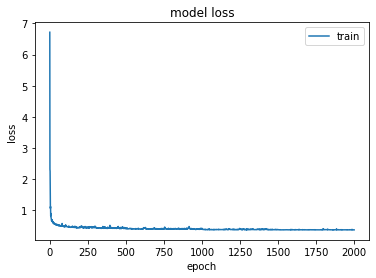

In [14]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

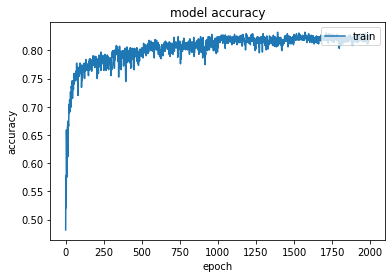

In [15]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

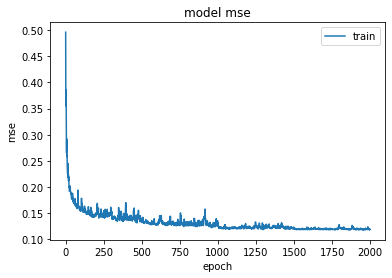

In [16]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

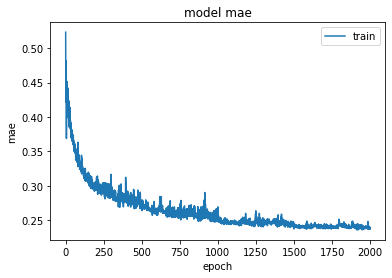

In [17]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()